### **INTRODUCCIÓN A LA MINERÍA DE DATOS**
#### **Práctica 2: Clasificación**
- **Universidad de Córdoba**
- **Escuela Politécnica Superior de Córdoba**
- **Grado en Ingeniería Informática**
- **Mención: Computación**
- **Cuarto año - Primer cuatrimestre**
- **Autor:** Ventura Lucena Martínez
- **Email:** <i72lumav@uco.es>
---

#### **Conjunto de datos**
Se hará uso de los siguientes conjuntos de datos:

In [1]:
import pandas as pd

datasets = [
    '../datasets/csv2/BreastTissue.csv', '../datasets/csv2/contact-lens.csv', '../datasets/csv2/ecoli.csv', '../datasets/csv2/glass.csv', '../datasets/csv2/statlog.csv', '../datasets/csv2/iris.csv', '../datasets/csv2/PhishingData.csv',
    '../datasets/csv2/segment-challenge.csv', '../datasets/csv2/wine.csv', '../datasets/csv2/zoo.csv'
]

Se usarán los clasificadores:
- Árboles de decisión.
- K-Vecinos más cercanos.
- Máquinas de vectores soporte.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf = []

clf.append(DecisionTreeClassifier(class_weight="balanced"))
clf.append(KNeighborsClassifier(n_neighbors=9, p=1))
clf.append(SVC(gamma='auto', kernel="linear"))

model_name = ["Decision Trees", "K-Nearest Neighbor", "SVM"]

# Lists for saving the solutions:
trees_solutions = list()
knn_solutions = list()
svm_solutions = list()

Se hará uso de la validación cruzada:

In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=None)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

for i in datasets:
	df = pd.read_csv(i, header=None)

	if i == '../datasets/csv2/wine.csv':
		X = df.iloc[:, 1:]
		y = df.iloc[:, 0]
	else:
		X = df.iloc[:, :-1]
		y = df.iloc[:, -1]

	counter = 0

	print("\n===", i, "===")

	for model in clf:
			acc_score = []

			for train_index, test_index in kf.split(X):
				X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
				y_train, y_test = y[train_index], y[test_index]

				# Normalización [μ = 0, σ = 1]
				X_train = StandardScaler().fit_transform(X_train)
				X_test = StandardScaler().fit_transform(X_test)

				model.fit(X_train, y_train)
				pred_values = model.predict(X_test)

				acc = np.round(metrics.accuracy_score(pred_values, y_test), decimals=2)
				acc_score.append(acc)

			avg_acc_score = np.round(sum(acc_score) / 10, decimals=4)

			if counter == 0:
				trees_solutions.append(avg_acc_score)
			elif counter == 1:
				knn_solutions.append(avg_acc_score)
			else:
				svm_solutions.append(avg_acc_score)

			print(f"{model_name[counter]}: " f"{avg_acc_score}")
			counter += 1

	print("\n=== Total means ===")
	print("Decision Trees:", np.round(sum(trees_solutions) / len(trees_solutions), decimals=3))
	print("K-Nearest Neighbor:", np.round(sum(knn_solutions) / len(knn_solutions), decimals=3))
	print("SVM:", np.round(sum(svm_solutions) / len(svm_solutions), decimals=3))
	print()


=== ../datasets/csv2/BreastTissue.csv ===
Decision Trees: 0.164
K-Nearest Neighbor: 0.095
SVM: 0.085

=== Total means ===
Decision Trees: 0.164
K-Nearest Neighbor: 0.095
SVM: 0.085


=== ../datasets/csv2/contact-lens.csv ===
Decision Trees: 0.817
K-Nearest Neighbor: 0.567
SVM: 0.684

=== Total means ===
Decision Trees: 0.49
K-Nearest Neighbor: 0.331
SVM: 0.384


=== ../datasets/csv2/ecoli.csv ===
Decision Trees: 0.253
K-Nearest Neighbor: 0.262
SVM: 0.235

=== Total means ===
Decision Trees: 0.411
K-Nearest Neighbor: 0.308
SVM: 0.335


=== ../datasets/csv2/glass.csv ===
Decision Trees: 0.523
K-Nearest Neighbor: 0.524
SVM: 0.6

=== Total means ===
Decision Trees: 0.439
K-Nearest Neighbor: 0.362
SVM: 0.401


=== ../datasets/csv2/statlog.csv ===
Decision Trees: 0.183
K-Nearest Neighbor: 0.187
SVM: 0.169

=== Total means ===
Decision Trees: 0.388
K-Nearest Neighbor: 0.327
SVM: 0.355


=== ../datasets/csv2/iris.csv ===
Decision Trees: 0.265
K-Nearest Neighbor: 0.259
SVM: 0.3

=== Total mean

#### **Tests: Wilcoxon, Friedman e Iman-Davenport**

In [5]:
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
from scipy.stats import f
from scipy.stats import chi2

T1, p1 = wilcoxon(trees_solutions, knn_solutions)

print("\nWilcoxon test: Decision Trees & KNN:")
print(f"\tT value: {np.round(T1, decimals=3)}")
print(f"\tp value: {np.round(p1, decimals=3)}")

T2, p2 = friedmanchisquare(trees_solutions, knn_solutions, svm_solutions)

print("\nFriedman test: Decision Trees, KNN & SVM:")
print(f"\tT value: {np.round(T2, decimals=3)}")
print(f"\tp value: {np.round(p2, decimals=3)}")

tests1 = ['T wilcoxon', 'T friedman']
tests2 = ['p wilcoxon', 'p friedman']
tests_resultados1 = [T1, T2]
tests_resultados2 = [p1, p2]

davenport = ((10 - 1) * T2) / (10 * (3 - 1) - T2)

print("\nIman-Davenport test:")
print(f"\tT value: {np.round(davenport, decimals=3)}")
print(f"\tp value: {np.round(chi2.sf(davenport, 3 - 1), decimals=3)}")

if davenport > f.ppf(q=1 - 0.05, dfn=3 - 1, dfd=(3 - 1) * (10 - 1)):
	print("\nResult: Significant differences.")
else:
	print("\nResult: No significant differences.")
print()


Wilcoxon test: Decision Trees & KNN:
	T value: 13.0
	p value: 0.16

Friedman test: Decision Trees, KNN & SVM:
	T value: 1.4
	p value: 0.497

Iman-Davenport test:
	T value: 0.677
	p value: 0.713

Result: No significant differences.



#### **Validación de hiperparámetros con *grid search*: K-Nearest Neighbor**

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings

warnings.filterwarnings('ignore')

vecinos_grid = KNeighborsClassifier()

grid_values = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 'p': [1, 2]}

knn_grid_solutions = list()

for i in datasets:
	df = pd.read_csv(i, header=None)

	if i == 'wine.csv':
		X = df.iloc[:, 1:].values
		y = df.iloc[:, 0].values
	else:
		X = df.iloc[:, :-1].values
		y = df.iloc[:, -1].values

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

	# Normalización [μ = 0, σ = 1]:
	X_train = StandardScaler().fit_transform(X_train)
	X_test = StandardScaler().fit_transform(X_test)

	sol_grid = GridSearchCV(vecinos_grid, param_grid=grid_values, scoring='accuracy')
	sol_grid.fit(X_train, y_train)
	accuracy = accuracy_score(y_test, sol_grid.predict(X_test))
	knn_grid_solutions.append(accuracy)

print(f"\nKNN grid search: {np.round(sum(knn_grid_solutions) / len(knn_grid_solutions), decimals=3)}\n")


KNN grid search: 0.776



#### **Receiver Operating Characteristics (Curva ROC)**

In [7]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

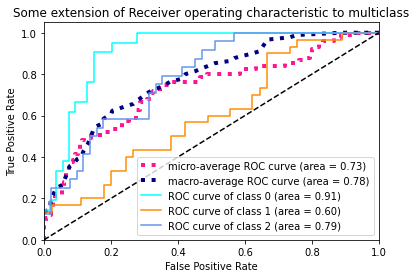

In [8]:
import matplotlib.pyplot as plt
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

Source: [ROC example from Scikit-Learn.](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

#### **Método `RIPPER` del módulo [`wittgenstein`](https://pypi.org/project/wittgenstein/)**

In [9]:
from sklearn.metrics import precision_score, recall_score
import wittgenstein as lw

df = pd.read_csv('../datasets/csv/heart.csv')
train, test = train_test_split(df, test_size=0.33, random_state=42)

# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(df, class_feat='target', pos_class=1)

# Print model
print('\n\n=== Heart dataset ===')
print(ripper_clf.out_model())

# Score
X_test = test.drop('target', axis=1)
y_test = test['target']

print("Accuracy:", ripper_clf.score(X_test, y_test))
print("Precision:", ripper_clf.score(X_test, y_test, precision_score))
print("Recall:", ripper_clf.score(X_test, y_test, recall_score))

# We can also ask our model to tell us why it made each positive prediction using give_reasons:
# ripper_clf.predict(new_data[:5], give_reasons=True)

# ---------------------------------------------------------------------------------------------

df = pd.read_csv('../datasets/csv/diabetes.csv')
train, test = train_test_split(df, test_size=0.33, random_state=42)

# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(df, class_feat='Outcome', pos_class=1)

# Print model
print('\n\n=== Diabetes dataset ===')
print(ripper_clf.out_model())

# Score
X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']

print("Accuracy:", ripper_clf.score(X_test, y_test))
print("Precision:", ripper_clf.score(X_test, y_test, precision_score))
print("Recall:", ripper_clf.score(X_test, y_test, recall_score))

# ---------------------------------------------------------------------------------------------

df = pd.read_csv('../datasets/csv/cancer.csv')
train, test = train_test_split(df, test_size=0.33, random_state=42)

# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(df, class_feat='diagnosis', pos_class='M')

# Print model
print('\n\n=== Cancer dataset ===')
print(ripper_clf.out_model())

# Score
X_test = test.drop('diagnosis', axis=1)
y_test = test['diagnosis']

print("Accuracy:", ripper_clf.score(X_test, y_test))
print("Precision:", ripper_clf.score(X_test, y_test, precision_score))
print("Recall:", ripper_clf.score(X_test, y_test, recall_score))
print("\n")



=== Heart dataset ===
[[thal=2 ^ slope=2 ^ restecg=1 ^ sex=0] V
[thal=2 ^ ca=0 ^ thalach=>176.6] V
[ca=0 ^ exang=0 ^ sex=0] V
[thal=2 ^ slope=2 ^ cp=1] V
[slope=2 ^ cp=2 ^ fbs=1] V
[cp=2 ^ thal=2] V
[thalach=153.0-159.0 ^ oldpeak=<0.38]]
None
Accuracy: 0.81
Precision: 0.9148936170212766
Recall: 0.7413793103448276


=== Diabetes dataset ===
[[Glucose=>167.0] V
[Glucose=147.0-167.0 ^ Age=42.6-51.0 ^ Insulin=<30.5] V
[Glucose=134.0-147.0 ^ DiabetesPedigreeFunction=0.45-0.56] V
[Glucose=147.0-167.0] V
[Glucose=134.0-147.0 ^ BloodPressure=<54.0] V
[Age=29.0-33.0 ^ Insulin=150.0-210.0] V
[Glucose=134.0-147.0 ^ DiabetesPedigreeFunction=0.3-0.37]]
None
Accuracy: 0.7519685039370079
Precision: 0.676923076923077
Recall: 0.5116279069767442


=== Cancer dataset ===
[[radius_mean=17.07-19.53] V
[radius_mean=>19.53] V
[perimeter_worst=115.9-133.5] V
[smoothness_worst=>0.161 ^ id=9010707.6-88144221.8] V
[perimeter_worst=105.74-115.9 ^ radius_mean=13.37-14.06] V
[radius_mean=15.06-17.07 ^ fractal_dim

#### **Máquina de vectores soporte lineal con factor de regularización C = 1**

In [10]:
datasets = [
    '../datasets/csv2/BreastTissue.csv', '../datasets/csv2/contact-lens.csv', '../datasets/csv2/ecoli.csv', '../datasets/csv2/glass.csv', '../datasets/csv2/statlog.csv', '../datasets/csv2/iris.csv', '../datasets/csv2/PhishingData.csv',
    '../datasets/csv2/segment-challenge.csv', '../datasets/csv2/wine.csv', '../datasets/csv2/zoo.csv'
]

svm_solutions = list()

for i in datasets:
	df = pd.read_csv(i, header=None)

	if i == 'wine.csv':
		X = df.iloc[:, 1:].values
		y = df.iloc[:, 0].values
	else:
		X = df.iloc[:, :-1].values
		y = df.iloc[:, -1].values

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

	# Normalización [μ = 0, σ = 1]:
	X_train = StandardScaler().fit_transform(X_train)
	X_test = StandardScaler().fit_transform(X_test)

	clf = SVC(C=1, kernel='linear', random_state=42).fit(X_train, y_train)
	accuracy = accuracy_score(y_test, clf.predict(X_test))
	svm_solutions.append(accuracy)

print(f"Average SVM accuracy: {np.round(sum(svm_solutions) / len(svm_solutions), decimals=3)}\n\n")

Average SVM accuracy: 0.753




#### **Método `GridSearchCV` para la obtención de hiper-parámetros**
Se utilizarán los siguientes valores:

parameters = [
 	{"kernel": ["rbf"], "gamma": [0.01, 0.1, 1.0], "C": [1, 10, 100, 1000]},
 	{"kernel": ["linear"], "C": [1, 10, 100, 1000]}
]


In [11]:
SVM_grid = SVC()

# Set the parameters by cross-validation
parameters = [
    {
        "kernel": ["rbf"],
        "gamma": [0.01, 0.1, 1.0],
        "C": [1, 10, 100, 1000]
    },
    {
        "kernel": ["linear"],
        "C": [1, 10, 100, 1000]
    },
]

svm_grid_solutions = list()

for i in datasets:
	df = pd.read_csv(i, header=None)

	if i == 'wine.csv':
		X = df.iloc[:, 1:].values
		y = df.iloc[:, 0].values
	else:
		X = df.iloc[:, :-1].values
		y = df.iloc[:, -1].values

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

	# Normalización [μ = 0, σ = 1]:
	X_train = StandardScaler().fit_transform(X_train)
	X_test = StandardScaler().fit_transform(X_test)

	sol_grid = GridSearchCV(SVM_grid, param_grid=parameters, scoring='accuracy')
	sol_grid.fit(X_train, y_train)
	accuracy = accuracy_score(y_test, sol_grid.predict(X_test))
	svm_grid_solutions.append(accuracy)

print(f"Average GridSearch SVM accuracy: {np.round(sum(svm_grid_solutions) / len(svm_grid_solutions), decimals=3)}\n\n")


Average GridSearch SVM accuracy: 0.791




#### **Test de McNemar**

In [12]:
from statsmodels.stats.contingency_tables import mcnemar

df = pd.read_csv('../datasets/csv/Breast_GSE45827.csv')
X = df.iloc[:, 2:-1]
y = df.type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalización [μ = 0, σ = 1]
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Árboles de decisión
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('\nBreast dataset:')
print(f"\tDecision Trees accuracy: {metrics.accuracy_score(y_test, y_pred_tree)}")

# SVM
clf = SVC().fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
print('\nBreast dataset:')
print(f"\tSVM accuracy: {metrics.accuracy_score(y_test, y_pred_svm)}")

y_test = np.array(y_test)
y_pred_tree = np.array(y_pred_tree)
y_pred_svm = np.array(y_pred_svm)

a = b = c = d = 0

for i in range(len(y_test)):
	if y_test[i] == y_pred_tree[i] and y_test[i] == y_pred_svm[i]:
		a += 1
	if y_test[i] == y_pred_tree[i] and y_test[i] != y_pred_svm[i]:
		b += 1
	if y_test[i] != y_pred_tree[i] and y_test[i] == y_pred_svm[i]:
		c += 1
	if y_test[i] != y_pred_tree[i] and y_test[i] != y_pred_svm[i]:
		d += 1

# define contingency table
table = [[a, b], [c, d]]

# calculate mcnemar test
result = mcnemar(table, exact=True)

# summarize the finding
print('\nStatistic=%.3f, P-value=%.3f' % (result.statistic, result.pvalue))

# interpret the p-value
if result.pvalue > 0.05:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')
print()


Breast dataset:
	Decision Trees accuracy: 0.68

Breast dataset:
	SVM accuracy: 0.84

Statistic=4.000, P-value=0.077
Same proportions of errors (fail to reject H0)



#### **Agrupaciones de clasificadores**

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

datasets = ['../datasets/csv/BreastTissue.csv', '../datasets/csv/divorce.csv', '../datasets/csv/iris.csv', '../datasets/csv/PhishingData.csv', '../datasets/csv/segment-challenge.csv']

trees_solution = list()
svm_solution = list()

for i in datasets:
	df = pd.read_csv(i, header=None)

	X = df.iloc[:, :-1].values
	y = df.iloc[:, -1].values

	sol = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)
	trees_solution.append(sol.mean())

	sol = cross_val_score(SVC(), X, y, cv=10)
	svm_solution.append(sol.mean())

print("\n === 10 partitions cross-validation === ")
print(f"\tDecision Trees average: {np.round(sum(trees_solution) / len(trees_solution), decimals=3)}")
print(f"\tSVM average: {np.round(sum(svm_solution) / len(svm_solution), decimals=3)}")

#-----------------------------------------------------------------------------

trees_solution_bagging = list()
svm_solution_bagging = list()

for i in datasets:
	df = pd.read_csv(i, header=None)

	X = df.iloc[:, :-1].values
	y = df.iloc[:, -1].values

	arbol = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, random_state=1)
	sol = cross_val_score(arbol, X, y, cv=10)
	trees_solution_bagging.append(sol.mean())

	svm = BaggingClassifier(SVC(), n_estimators=5, random_state=1)
	sol = cross_val_score(svm, X, y, cv=10)
	svm_solution_bagging.append(sol.mean())

print("\n === Bagging === ")
print(f"\tDecision Trees average: {np.round(sum(trees_solution_bagging) / len(trees_solution_bagging), decimals=3)}")
print(f"\tSVM average: {np.round(sum(svm_solution_bagging) / len(svm_solution_bagging), decimals=3)}")

#-----------------------------------------------------------------------------

sol_ada = list()
sol_gradient = list()

for i in datasets:
	df = pd.read_csv(i, header=None)

	X = df.iloc[:, :-1].values
	y = df.iloc[:, -1].values

	ada = AdaBoostClassifier()
	sol = cross_val_score(ada, X, y, cv=10)
	sol_ada.append(sol.mean())

	gradient = GradientBoostingClassifier()
	sol = cross_val_score(gradient, X, y, cv=10)
	sol_gradient.append(sol.mean())

print("\n === Boosting === ")
print(f"\tAdaboost average: {np.round(sum(sol_ada) / len(sol_ada), decimals=3)}")
print(f"\tGradient tree average: {np.round(sum(sol_gradient) / len(sol_gradient), decimals=3)}")

#-----------------------------------------------------------------------------

T, p = friedmanchisquare(trees_solution_bagging, svm_solution_bagging, sol_ada, sol_gradient)
print("\n === Friedman === ")
print(f"\tT value: {np.round(T, decimals=3)}")
print(f"\tp value: {np.round(p, decimals=3)}")

davenport = ((10 - 1) * T) / (10 * (5 - 1) - T)

print("\n === Iman-Davenport === ")
print(f"\tT value: {np.round(davenport, decimals=3)}")
print(f"\tp value: {np.round(chi2.sf(davenport, 3 - 1), decimals=3)}")

if davenport > f.ppf(q=1 - 0.05, dfn=5 - 1, dfd=(5 - 1) * (10 - 1)):
	print("\nSignificant differences.")
else:
	print("\nNo significant differences.")

print("\n === Wilcoxon === ")
T, p = wilcoxon(trees_solution, trees_solution_bagging)
print("\n\tTrees vs Bagging_tree: \t[T:", T, "] - [p:", np.round(p, decimals=3), "]")

T, p = wilcoxon(trees_solution, sol_ada)
print("\n\tTrees vs Ada_boost: \t[T:", T, "] - [p:", np.round(p, decimals=3), "]")

T, p = wilcoxon(trees_solution, sol_gradient)
print("\n\tTrees vs Gradient_boost: \t[T:", T, "] - [p:", np.round(p, decimals=3), "]")

T, p = wilcoxon(svm_solution, svm_solution_bagging)
print("\nSVM vs Bagging_SVM: \t[T:", T, "] - [p:", np.round(p, decimals=3), "]")

T, p = wilcoxon(svm_solution, sol_ada)
print("\n\tSVM vs Ada_boost: \t[T:", T, "] - [p:", np.round(p, decimals=3), "]")

T, p = wilcoxon(svm_solution, sol_gradient)
print("\n\tSVM vs Gradient_boost: \t[T:", T, "] - [p:", np.round(p, decimals=3), "]\n\n")



 === 10 partitions cross-validation === 
	Decision Trees average: nan
	SVM average: nan

 === Bagging === 
	Decision Trees average: nan
	SVM average: nan

 === Boosting === 
	Adaboost average: nan
	Gradient tree average: nan

 === Friedman === 
	T value: 7.435
	p value: 0.059

 === Iman-Davenport === 
	T value: 2.055
	p value: 0.358

No significant differences.

 === Wilcoxon === 

	Trees vs Bagging_tree: 	[T: 3.0 ] - [p: 0.465 ]

	Trees vs Ada_boost: 	[T: 0.0 ] - [p: 0.625 ]

	Trees vs Gradient_boost: 	[T: 0.0 ] - [p: 0.068 ]

SVM vs Bagging_SVM: 	[T: 3.0 ] - [p: 0.465 ]

	SVM vs Ada_boost: 	[T: 5.0 ] - [p: 0.625 ]

	SVM vs Gradient_boost: 	[T: 0.0 ] - [p: 0.068 ]




#### **Aplicación de clasificador base**

In [14]:
datasets = [
    '../datasets/csv/BreastTissue.csv', '../datasets/csv/contact-lens.csv', '../datasets/csv/ecoli.csv', '../datasets/csv/glass.csv', '../datasets/csv/statlog.csv', '../datasets/csv/PhishingData.csv',
    '../datasets/csv/segment-challenge.csv', '../datasets/csv/wine.csv', '../datasets/csv/zoo.csv'
]

print()
counter = 0

for i in datasets:
	df = pd.read_csv(i, header=None)

	if i == '../datasets/csv/wine.csv':
		X = df.iloc[:, 1:].values
		y = df.iloc[:, 0].values
	else:
		X = df.iloc[:, :-1].values
		y = df.iloc[:, -1].values

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
	clf = DecisionTreeClassifier(class_weight="balanced").fit(X_train, y_train)
	pred_values = clf.predict(X_test)
	counter += 1
	print(" ~ Accuracy", counter, ":", np.round(metrics.accuracy_score(pred_values, y_test), decimals=2))

print()


 ~ Accuracy 1 : 0.77
 ~ Accuracy 2 : 0.62
 ~ Accuracy 3 : 0.95
 ~ Accuracy 4 : 0.66
 ~ Accuracy 5 : 0.84
 ~ Accuracy 6 : 0.78
 ~ Accuracy 7 : 0.86
 ~ Accuracy 8 : 0.95
 ~ Accuracy 9 : 0.91



#### **Métodos one-vs-one (OVO), one-vs-all (OVA)**

In [15]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier

sol_ovo = list()
sol_ova = list()
sol_ecoc = list()

counter = 0

for i in datasets:
	df = pd.read_csv(i, header=None)

	if i == './csv/wine.csv':
		X = df.iloc[:, 1:].values
		y = df.iloc[:, 0].values
	else:
		X = df.iloc[:, :-1].values
		y = df.iloc[:, -1].values

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
	print()

	# OVO
	clf = OneVsOneClassifier(DecisionTreeClassifier(class_weight="balanced"))
	clf.fit(X_train, y_train)
	pred_values = clf.predict(X_test)
	sol = metrics.accuracy_score(pred_values, y_test)
	sol_ovo.append(sol)
	counter += 1
	print(" ~ Accuracy OVO", counter, ":", np.round(sol, decimals=2))

	# OVA
	clf = OneVsRestClassifier(DecisionTreeClassifier(class_weight="balanced"))
	clf.fit(X_train, y_train)
	pred_values = clf.predict(X_test)
	sol = metrics.accuracy_score(pred_values, y_test)
	sol_ova.append(sol)
	print(" ~ Accuracy OVA", counter, ":", np.round(sol, decimals=2))

	# ECOC
	clf = OutputCodeClassifier(DecisionTreeClassifier(class_weight="balanced"), code_size=3)
	clf.fit(X_train, y_train)
	pred_values = clf.predict(X_test)
	sol = metrics.accuracy_score(pred_values, y_test)
	sol_ecoc.append(sol)
	print(" ~ Accuracy ECOC", counter, ":", np.round(sol, decimals=2))


 ~ Accuracy OVO 1 : 0.74
 ~ Accuracy OVA 1 : 0.74
 ~ Accuracy ECOC 1 : 0.77

 ~ Accuracy OVO 2 : 0.75
 ~ Accuracy OVA 2 : 0.5
 ~ Accuracy ECOC 2 : 0.62

 ~ Accuracy OVO 3 : 0.95
 ~ Accuracy OVA 3 : 0.95
 ~ Accuracy ECOC 3 : 0.95

 ~ Accuracy OVO 4 : 0.58
 ~ Accuracy OVA 4 : 0.66
 ~ Accuracy ECOC 4 : 0.61

 ~ Accuracy OVO 5 : 0.85
 ~ Accuracy OVA 5 : 0.81
 ~ Accuracy ECOC 5 : 0.88

 ~ Accuracy OVO 6 : 0.82
 ~ Accuracy OVA 6 : 0.79
 ~ Accuracy ECOC 6 : 0.79

 ~ Accuracy OVO 7 : 0.88
 ~ Accuracy OVA 7 : 0.79
 ~ Accuracy ECOC 7 : 0.89

 ~ Accuracy OVO 8 : 0.02
 ~ Accuracy OVA 8 : 0.02
 ~ Accuracy ECOC 8 : 0.0

 ~ Accuracy OVO 9 : 0.91
 ~ Accuracy OVA 9 : 0.97
 ~ Accuracy ECOC 9 : 0.94


In [16]:
T, p = friedmanchisquare(sol_ovo, sol_ova, sol_ecoc)

print(" === Friedman === ")
print(f" ~ Valor de T: {np.round(T, decimals=3)}")
print(f" ~ Valor de p: {np.round(p, decimals=3)}")

davenport = ((10 - 1) * T) / (10 * (3 - 1) - T)

print("\n === Iman-Davenport === ")
print(" ~ Valor de T:", np.round(davenport, decimals=3))
print(" ~ Valor de p =", np.round(chi2.sf(davenport, 3 - 1), decimals=3))

if davenport > f.ppf(q=1 - 0.05, dfn=3 - 1, dfd=(3 - 1) * (10 - 1)):
	print("\nSignificant differences.\n")
else:
	print("\nNo significant differences.\n")

 === Friedman === 
 ~ Valor de T: 1.312
 ~ Valor de p: 0.519

 === Iman-Davenport === 
 ~ Valor de T: 0.632
 ~ Valor de p = 0.729

No significant differences.

